In [229]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import pandas
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [230]:
def openfunc(filename):
    table = pd.read_csv(filename, sep=';', index_col=[6], parse_dates=[6])
    display(table.head())
    print(f'Is data in chronological order? {table.index.is_monotonic}')
    return table

,open,high,low,close,volume,marketCap
timestamp,,,,,,
2021-04-07 00:00:00+00:00,4.348215,4.399235,4.292814,4.336569,0.0,0
2021-04-08 00:00:00+00:00,4.326586,4.481990,4.307998,4.480014,0.0,0
2021-04-09 00:00:00+00:00,4.480854,4.550329,4.459652,4.509642,0.0,0
2021-04-10 00:00:00+00:00,4.510322,4.744371,4.493670,4.628397,0.0,0
2021-04-11 00:00:00+00:00,4.628595,4.705797,4.589623,4.661469,0.0,0


Is data in chronological order? True


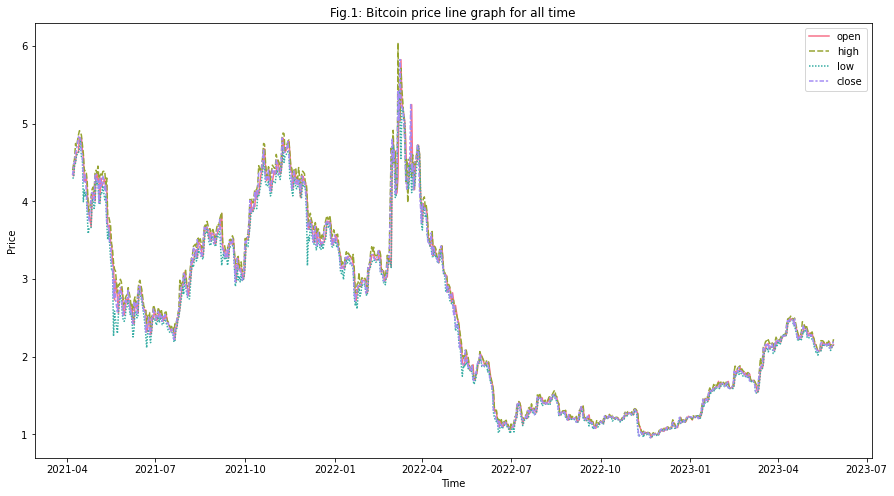

In [231]:
bit = openfunc('/Users/stepan5dol/Downloads/BITS_ALL_graph_coinmarketcap.csv')
bit = bit.drop(columns=['volume', 'marketCap'])
    
plt.figure(figsize=(15,8))
sns.lineplot(data=bit, palette="husl")
plt.legend(bit.columns)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Fig.1: Bitcoin price line graph for all time')
plt.show()

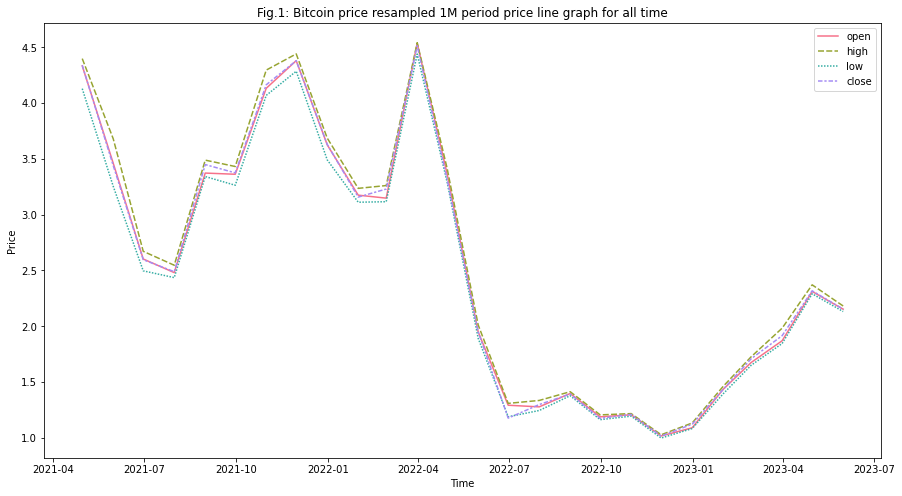

In [232]:
bit_dec = bit.resample('1M').median()

plt.figure(figsize=(15,8))
sns.lineplot(data=bit_dec, palette="husl")
plt.legend(bit.columns)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Fig.1: Bitcoin price resampled 1M period price line graph for all time')
plt.show()

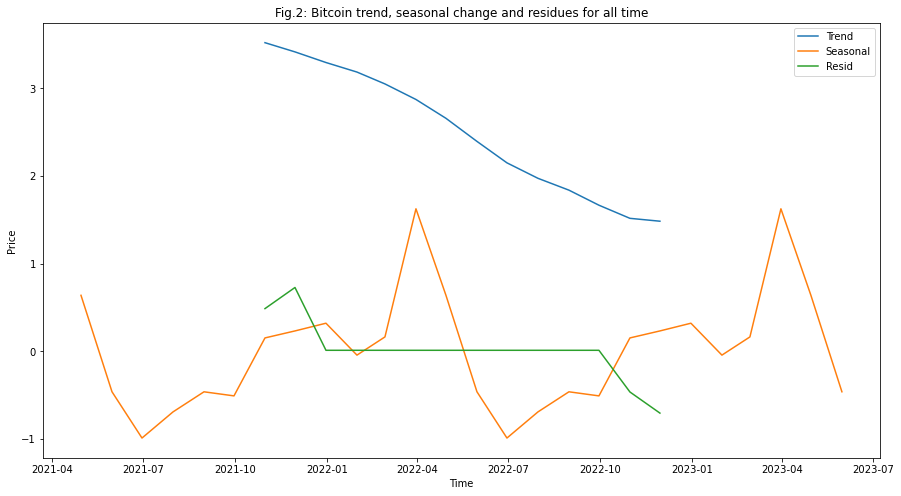

In [233]:
decomposed = seasonal_decompose(bit_dec['close'])

plt.figure(figsize=(15,8))
sns.lineplot(data=decomposed.trend, palette="husl")    # тренд
sns.lineplot(data=decomposed.seasonal, palette="husl") # сезонная составляющая
sns.lineplot(data=decomposed.resid , palette="husl")   # остаток декомпозиции
plt.legend(['Trend', 'Seasonal', 'Resid'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Fig.2: Bitcoin trend, seasonal change and residues for all time')
plt.show()

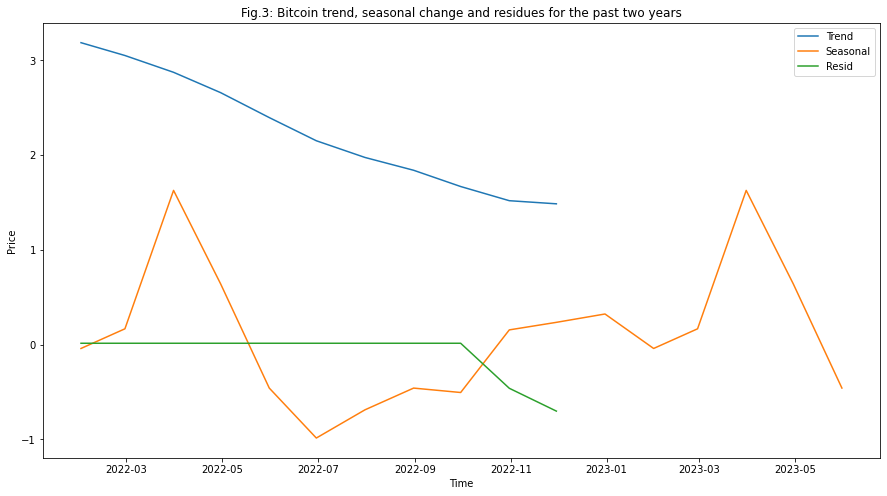

In [234]:
plt.figure(figsize=(15,8))
sns.lineplot(data=decomposed.trend['2022':'2023'], palette="husl")    # тренд
sns.lineplot(data=decomposed.seasonal['2022':'2023'], palette="husl") # сезонная составляющая
sns.lineplot(data=decomposed.resid['2022':'2023'] , palette="husl")   # остаток декомпозиции
plt.legend(['Trend', 'Seasonal', 'Resid'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Fig.3: Bitcoin trend, seasonal change and residues for the past two years')
plt.show()

,open,high,low,close,volume,marketCap
timestamp,,,,,,
2015-02-25 00:00:00+00:00,75.840728,75.348224,74.703657,74.348217,374.76660,1.909635e+07
2015-03-09 00:00:00+00:00,60.382500,60.382500,60.382500,60.770000,8634.69750,1.519224e+07
2015-03-13 00:00:00+00:00,61.040000,61.040000,61.040000,62.110000,4595.09120,1.535766e+07
2015-03-17 00:00:00+00:00,61.995000,61.995000,61.995000,61.380000,265587.81990,1.559794e+07
2015-03-21 00:00:00+00:00,59.145000,59.145000,59.145000,59.145000,12199.83915,1.488088e+07


Is data in chronological order? True


Timestamp('2015-02-25 00:00:00+0000', tz='UTC')

Timestamp('2023-05-25 00:00:00+0000', tz='UTC')

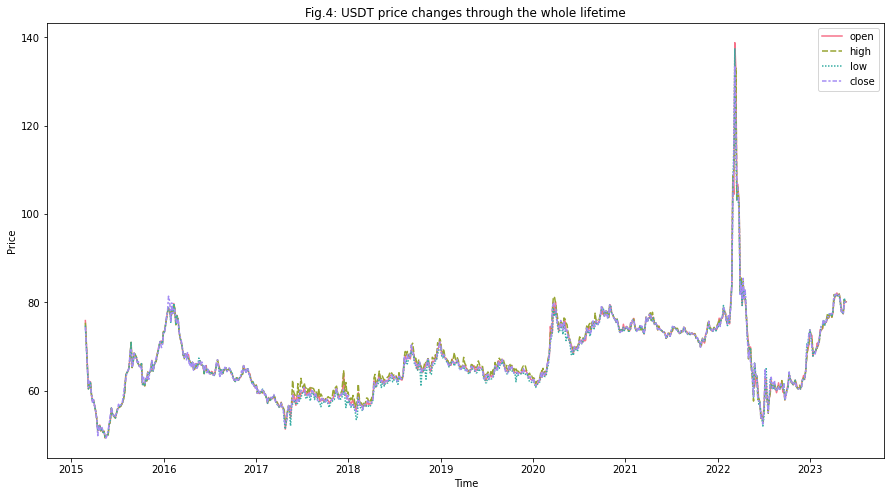

In [235]:
usdt = openfunc('/Users/stepan5dol/Downloads/USDT_ALL_graph_coinmarketcap.csv')
usdt = usdt.drop(columns=['volume', 'marketCap'])
usdt = usdt
    
display(usdt.index.min(), usdt.index.max())
plt.figure(figsize=(15,8))
sns.lineplot(data=usdt, palette="husl")
plt.legend(usdt.columns)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Fig.4: USDT price changes through the whole lifetime')
plt.show()

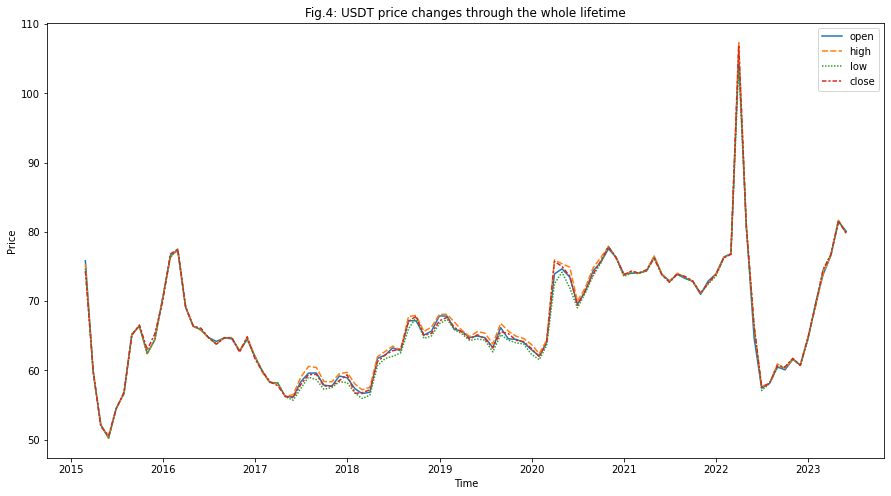

In [236]:
usdt_dec = usdt.resample('1M').median()

plt.figure(figsize=(15,8))
sns.lineplot(data=usdt_dec)
plt.legend(usdt_dec.columns)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Fig.4: USDT price changes through the whole lifetime')
plt.show()

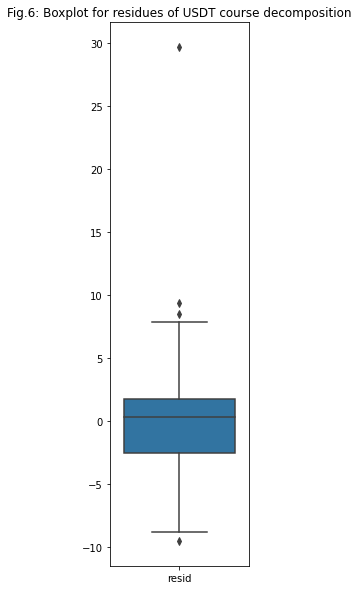

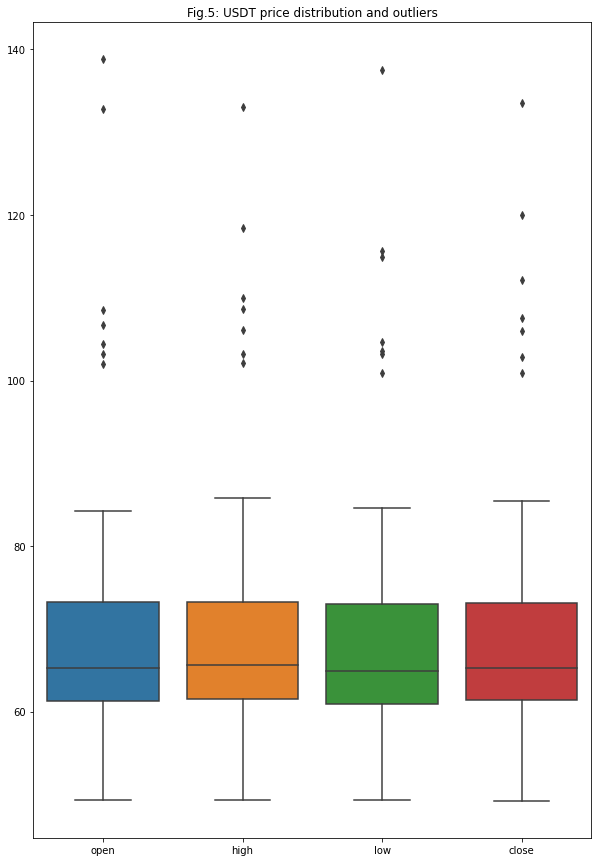

In [237]:
resids_usdt = decomposed_usdt.resid

# Series to DataFrame
df = pd.DataFrame(resids_usdt)

plt.figure(figsize=(2.5,10))
sns.boxplot(data=df)
plt.title('Fig.6: Boxplot for residues of USDT course decomposition')
plt.show()

# Calculate upper and lower whisker values
whiskers = []
for line in df.columns:
    whisker_vals = df[line].quantile([0.25, 0.75]).values
    iqr = whisker_vals[1] - whisker_vals[0]
    upper_whisker = whisker_vals[1] + 1.5 * iqr
    lower_whisker = whisker_vals[0] - 1.5 * iqr
    whiskers.append((lower_whisker, upper_whisker))

plt.figure(figsize=(10,15))
sns.boxplot(data=usdt)
plt.title('Fig.5: USDT price distribution and outliers')
plt.show()

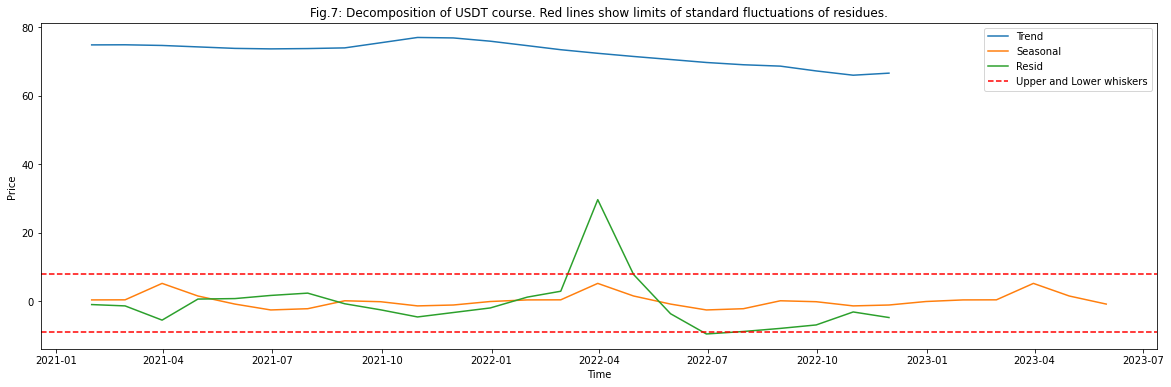

In [238]:
decomposed_usdt = seasonal_decompose(usdt_dec['high'])


plt.figure(figsize=(20,6))
sns.lineplot(data=decomposed_usdt.trend['2021':'2023'], palette="husl")    # тренд
sns.lineplot(data=decomposed_usdt.seasonal['2021':'2023'], palette="husl") # сезонная составляющая
sns.lineplot(data=decomposed_usdt.resid['2021':'2023'], palette="husl")   # остаток декомпозиции
plt.axhline(y=whiskers[0][0], color='r', linestyle='--')
plt.axhline(y=whiskers[0][1], color='r', linestyle='--')
plt.legend(['Trend', 'Seasonal', 'Resid', 'Upper and Lower whiskers'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Fig.7: Decomposition of USDT course. Red lines show limits of standard fluctuations of residues.')
plt.show()

,open,high,low,close,volume,marketCap
timestamp,,,,,,
2017-07-25 00:00:00+00:00,6.912399,6.940961,6.096835,6.342195,8.716416e+06,6.352401e+08
2017-07-27 00:00:00+00:00,6.242774,6.455097,5.998952,6.410944,2.046114e+07,6.398921e+08
2017-07-30 00:00:00+00:00,6.425370,6.437455,6.141234,6.345680,1.335026e+07,6.334825e+08
2017-08-02 00:00:00+00:00,6.013278,6.120472,5.898385,6.080370,1.548485e+07,6.057346e+08
2017-08-05 00:00:00+00:00,6.435606,8.666422,6.414756,7.720893,3.252480e+07,7.720894e+08


Is data in chronological order? True


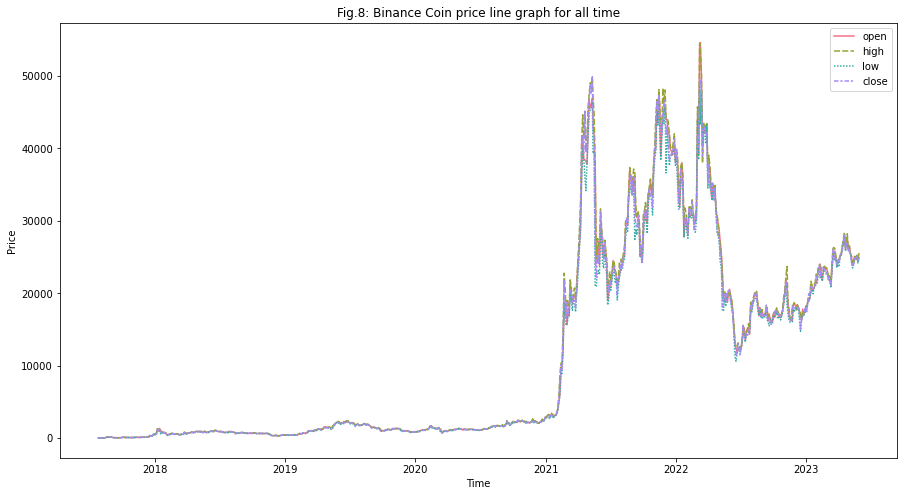

In [239]:
bnb = openfunc('/Users/stepan5dol/Downloads/BNB_ALL_graph_coinmarketcap.csv')
bnb = bnb.drop(columns=['volume', 'marketCap'])
    
plt.figure(figsize=(15,8))
sns.lineplot(data=bnb, palette="husl")
plt.legend(bnb.columns)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Fig.8: Binance Coin price line graph for all time')
plt.show()

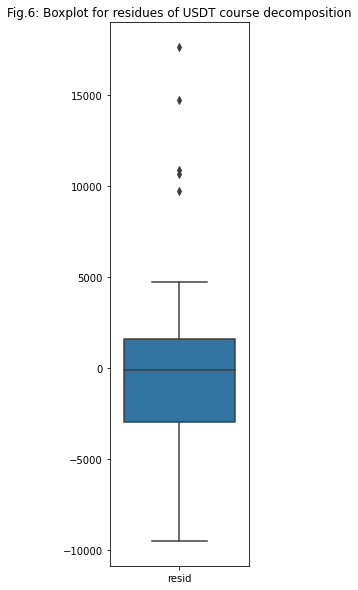

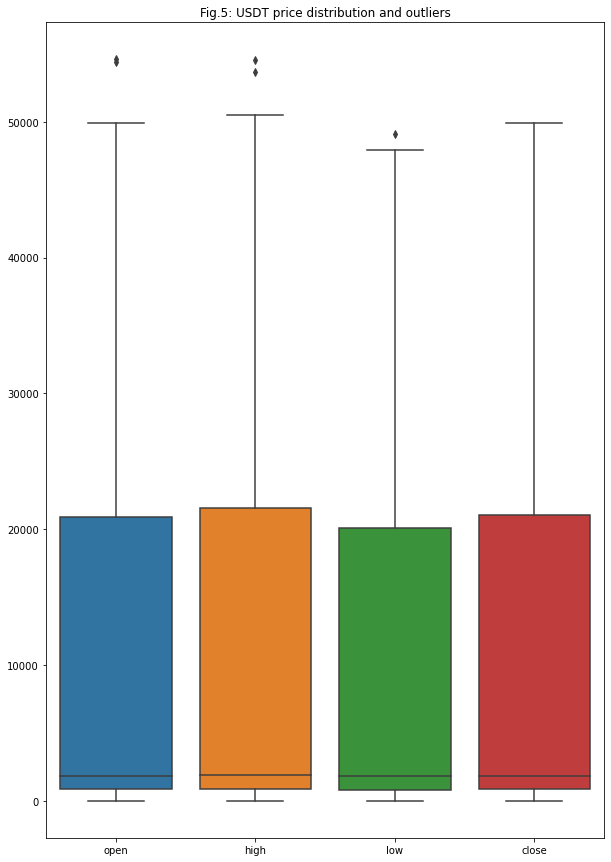

In [243]:
bnb_dec = bnb.resample('1M').median()

decomposed_bnb = seasonal_decompose(bnb_dec['high'])

resids_bnb = decomposed_bnb.resid

# Series to DataFrame
df_bnb = pd.DataFrame(resids_bnb)

plt.figure(figsize=(2.5,10))
sns.boxplot(data=df_bnb)
plt.title('Fig.6: Boxplot for residues of USDT course decomposition')
plt.show()

# Calculate upper and lower whisker values
whiskers_bnb = []
for line in df_bnb.columns:
    whisker_vals = df_bnb[line].quantile([0.25, 0.75]).values
    iqr = whisker_vals[1] - whisker_vals[0]
    upper_whisker = whisker_vals[1] + 1.5 * iqr
    lower_whisker = whisker_vals[0] - 1.5 * iqr
    whiskers_bnb.append((lower_whisker, upper_whisker))

plt.figure(figsize=(10,15))
sns.boxplot(data=bnb)
plt.title('Fig.5: USDT price distribution and outliers')
plt.show()

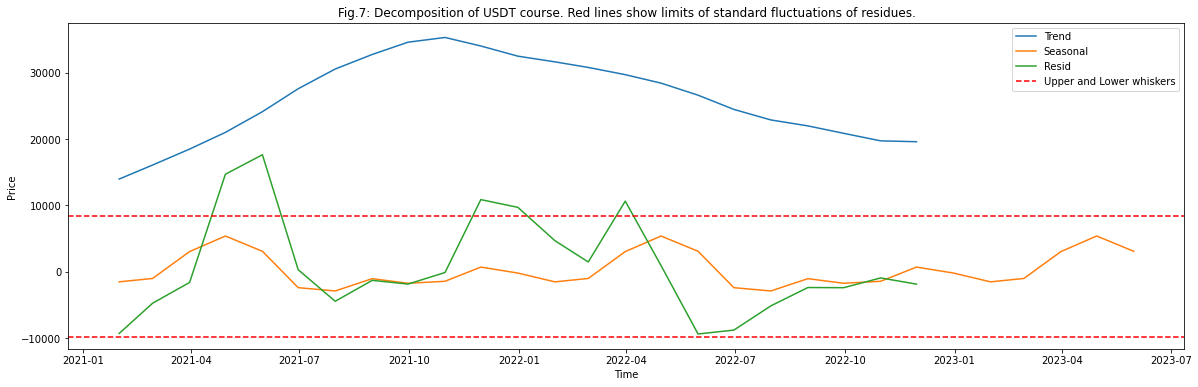

In [244]:
plt.figure(figsize=(20,6))
sns.lineplot(data=decomposed_bnb.trend['2021':'2023'], palette="husl")    # тренд
sns.lineplot(data=decomposed_bnb.seasonal['2021':'2023'], palette="husl") # сезонная составляющая
sns.lineplot(data=decomposed_bnb.resid['2021':'2023'], palette="husl")   # остаток декомпозиции
plt.axhline(y=whiskers_bnb[0][0], color='r', linestyle='--')
plt.axhline(y=whiskers_bnb[0][1], color='r', linestyle='--')
plt.legend(['Trend', 'Seasonal', 'Resid', 'Upper and Lower whiskers'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Fig.7: Decomposition of USDT course. Red lines show limits of standard fluctuations of residues.')
plt.show()